In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
df_esp32 = pd.read_csv("esp32conso.xls.csv", sep=";")
df_nano = pd.read_csv("arduinoconso.xls.csv", sep=";")

# Convert data to float
data_esp32 = [float(x) for x in df_esp32["Value"]]
data_arduino = [float(x) for x in df_nano["Value"]]

time_esp32 = pd.to_datetime(df_esp32["Time"])
time_arduino = pd.to_datetime(df_nano["Time"])




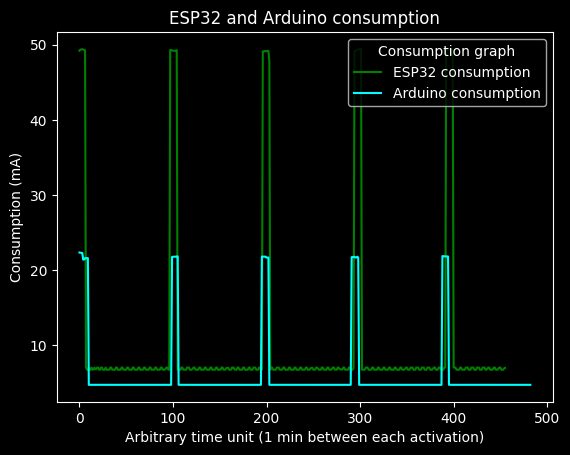

In [6]:
# Plot the data
plt.plot(data_esp32, label="ESP32 consumption", color="green")
plt.plot(data_arduino, label="Arduino consumption", color="cyan")
plt.legend()
plt.legend(title="Consumption graph",loc="upper right")
plt.xlabel("Arbitrary time unit (1 min between each activation)")
plt.ylabel("Consumption (mA)")
plt.title("ESP32 and Arduino consumption")
plt.style.use('dark_background')

plt.show()

In [7]:
# Print mean and standard deviation
print("ESP32 mean: ", round(sum(data_esp32)/len(data_esp32),4),"mA")
print("ESP32 standard deviation: ", round((sum([(x - sum(data_esp32)/len(data_esp32))**2 for x in data_esp32])/len(data_esp32))**0.5,4))
print("Arduino mean: ", round(sum(data_arduino)/len(data_arduino),4),"mA")
print("Arduino standard deviation: ", round((sum([(x - sum(data_arduino)/len(data_arduino))**2 for x in data_arduino])/len(data_arduino))**0.5,4))

print("----------------------------------------------")
# Print total time and total consumption 
diff_time_esp32 = time_esp32[len(time_esp32)-1] - time_esp32[0]
diff_time_arduino = time_arduino[len(time_arduino)-1] - time_arduino[0]
print("ESP32 total time: ", divmod(diff_time_esp32.total_seconds(), 60)[0], "min", divmod(diff_time_esp32.total_seconds(), 60)[1], "s")
print("ESP32 total consumption: ", round(sum(data_esp32),2), "mA")
print("Arduino total time: ", divmod(diff_time_arduino.total_seconds(), 60)[0], "min", divmod(diff_time_arduino.total_seconds(), 60)[1], "s")
print("Arduino total consumption: ", round(sum(data_arduino),2), "mA")

print("----------------------------------------------")
# Print average consumption in m Watts/hour
print("ESP32 average consumption: ", round(sum(data_esp32)/len(data_esp32)*60*60/1000,4), "mW/h")
print("Arduino average consumption: ", round(sum(data_arduino)/len(data_arduino)*60*60/1000,4), "mW/h")


ESP32 mean:  10.5101 mA
ESP32 standard deviation:  11.8473
Arduino mean:  6.1727 mA
Arduino standard deviation:  4.6997
----------------------------------------------
ESP32 total time:  5.0 min 0.0 s
ESP32 total consumption:  4792.6 mA
Arduino total time:  5.0 min 18.0 s
Arduino total consumption:  2981.44 mA
----------------------------------------------
ESP32 average consumption:  37.8363 mW/h
Arduino average consumption:  22.2219 mW/h
